In [19]:
import numpy as np
import matplotlib.pyplot as plt
import spectra

data = np.load('lower11.npz')['data']


data.shape = (2,-1)
print(data.shape)
data = data[0] + 1j*data[1]
data.shape = (-1,16000)

vs = np.fft.fft(data,axis = 1)
ps = np.abs(vs)**2
ps_avg = np.mean(ps,axis=0)


(2, 1584000)


## Now, let's loop through all the npz files and plot their average power spectra

### Lowers:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
freqs = np.fft.fftfreq(16000)
nfiles=10
all_blocks = np.zeros(((nfiles-1)*1000,16000))
for i in range (1,nfiles):
    data = np.load('lowerr'+str(i)+'.npz')['data']
    data.shape = (2,-1)
    
    data = data[0] + 1j*data[1]
    data.shape = (-1,16000)

    vs = np.fft.fft(data,axis = 1)
    ps = np.abs(vs)**2
    
    all_blocks[(i-1)*1000:(i)*1000,:] = ps
    
    
averagesl = np.mean(all_blocks,axis=0)
    
    

In [21]:
len(freqs)

16000

<IPython.core.display.Javascript object>


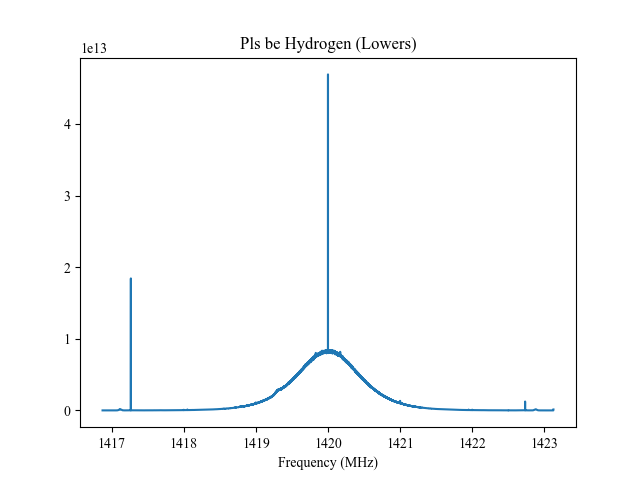

In [28]:
import matplotlib

e = np.fft.fftshift(averagesl)
%matplotlib notebook
matplotlib.rcParams['font.family'] = 'Times New Roman'
f = np.fft.fftshift(freqs)
plt.plot(f*-6.25+190+1230,e)
#plt.xlim(5100,5500)
plt.title('Pls be Hydrogen (Lowers)')
#plt.ylim(0.2e12,.45e12)
plt.savefig('Lower Hydrogen Line')
plt.xlabel('Frequency (MHz)')
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
nfiles=10
all_blocks = np.zeros(((nfiles-1)*1000,16000))
for i in range (1,nfiles):
    data = np.load('_upper'+str(i)+'.npz')['data']
    data.shape = (2,-1)
    
    data = data[0] + 1j*data[1]
    data.shape = (-1,16000)

    vs = np.fft.fft(data,axis = 1)
    ps = np.abs(vs)**2
    
    all_blocks[(i-1)*1000:(i)*1000,:] = ps
    
    
averagesu = np.mean(all_blocks,axis=0)
    
    

<IPython.core.display.Javascript object>


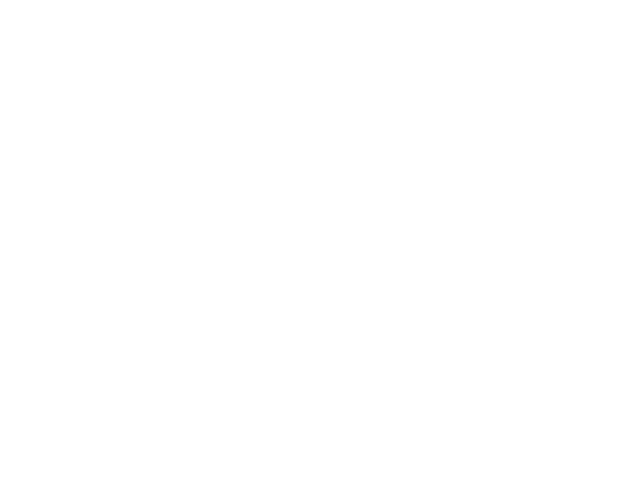

In [30]:
e = np.fft.fftshift(averagesu)
%matplotlib notebook
matplotlib.rcParams['font.family'] = 'Times New Roman'
f = np.fft.fftshift(freqs)
plt.plot(f*-6.25+190+1230,e)
#plt.xlim(5100,5500)
plt.title('Pls be Hydrogen (Uppers)')
plt.xlabel('Frequency (MHz)')
plt.savefig('Upper H line')
#plt.ylim(0.2e12,.45e12)
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
nfiles=10
all_blocks = np.zeros(((nfiles-1)*1000,16000))
for i in range (1,nfiles):
    data = np.load('GALACTIC'+str(i)+'.npz')['data']
    data.shape = (2,-1)
    
    data = data[0] + 1j*data[1]
    data.shape = (-1,16000)

    vs = np.fft.fft(data,axis = 1)
    ps = np.abs(vs)**2
    
    all_blocks[(i-1)*1000:(i)*1000,:] = ps
    
    
averagesg = np.mean(all_blocks,axis=0)
    
    

<IPython.core.display.Javascript object>


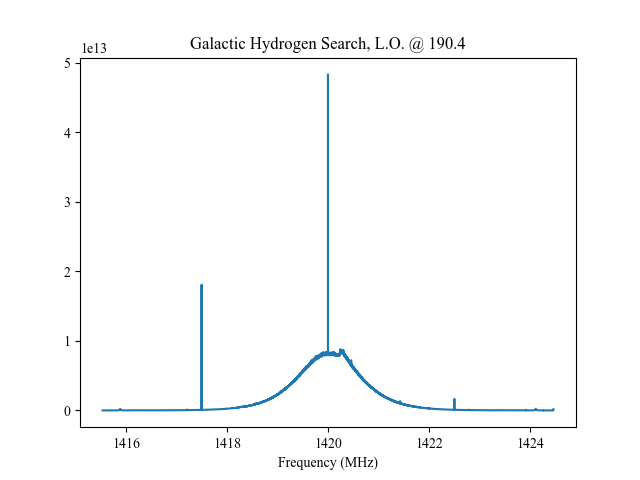

In [33]:

%matplotlib notebook
f = np.fft.fftshift(freqs)
plt.plot(f*-(62.5/7)+190+1230,np.fft.fftshift(averagesg))
#plt.xlim(5100,5500)
plt.title('Galactic Hydrogen Search, L.O. @ 190.4')
plt.xlabel('Frequency (MHz)')
plt.savefig('Galactic Uncalibrated')
#plt.ylim(0.2e12,.45e12)
plt.show()

# Get the Line Shape

In [34]:
s_on = averagesg

s_off = np.zeros((1,16000))
for i in range (len(s_on)//2,len(s_on)):
    s_off.append(s_on[len(s_on)-i-1])
for j in range (0,len(s_on)//2):
    s_off.append(s_on[j-1])
print(len(s_off)) 

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [35]:
s_on = averagesg

s_off = np.empty((16000))
for i in range (len(s_on)//2,len(s_on)):
    s_off[len(s_on)-i-1] = s_on[len(s_on)-i-1]
for j in range (0,len(s_on)//2):
    s_off[len(s_on)-j-1] = s_on[j-1]
print(len(s_off)) 

16000


In [ ]:
s_off

In [ ]:
print(s_off)

In [ ]:
plt.plot(s_off)
plt.plot(averagesg)

In [ ]:
s_line = averagesg/s_off


In [ ]:
print(s_line)

In [ ]:
plt.plot(np.fft.fftshift(s_line))
#plt.plot(np.fft.fftshift(averagesg))
plt.show()

In [ ]:
s_line = averagesg/s_off
plt.plot(np.fft.fftshift(s_line))
plt.show()

## Get the line intensity

In [36]:
s_cold = np.abs(np.fft.fft(np.loadtxt('ColdSky0')))
s_cal = np.abs(np.fft.fft(np.loadtxt('humans0')))
T_cal = 310.15
T_cold = 2.73
G = (T_cal-T_cold)*np.sum(s_cold)/(np.sum(s_cal-s_cold))
print(G)

489.3580495964705


<IPython.core.display.Javascript object>


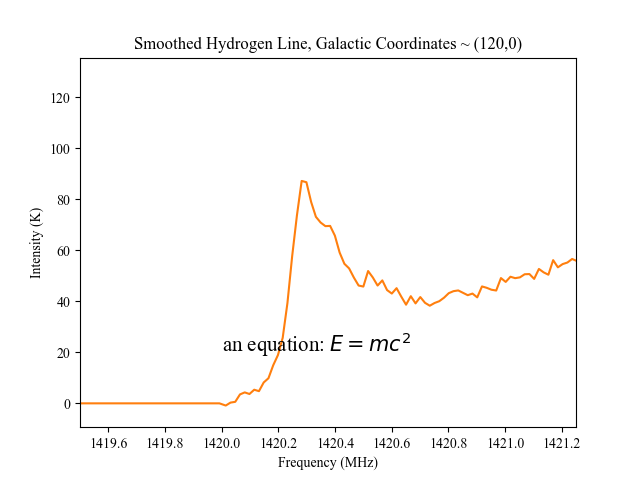

In [57]:
s_line = averagesg/s_off
plt.plot(np.fft.fftshift(freqs)*6.25+1430.4,G*np.fft.fftshift(s_line))
#plt.ylim(470,650)
#plt.xlim(1429.6,1430.4)
plt.show()

In [38]:
T_line = s_line*G

In [39]:
plt.plot(np.arange(0,len(T_line)), T_line)
plt.show()

# Let's smooth this

In [45]:
'''
s_on = averagesg

s_off =[]
for i in range (0,len(s_on)//2):
    s_off.append(s_on[len(s_on)-i-1])
for j in range (0,len(s_on)//2):
    s_off.append(s_on[len(s_on)//2+j-1])
print(len(s_off)) 
'''    



print(len(s_on))
inc = 30
freqs_sm = np.empty((len(freqs)//inc))
for i  in range (0, len(freqs)//inc):
    freqs_sm[i] = np.mean(freqs[inc*i:inc*(i+1)]
sm_off = []
sm_on = []

for i in range (0,len(s_on)//inc):
    sm_off.append(np.mean(s_off[i*inc:(i+1)*inc]))
    sm_on.append(np.mean(s_on[i*inc:(i+1)*inc]))

16000


<IPython.core.display.Javascript object>


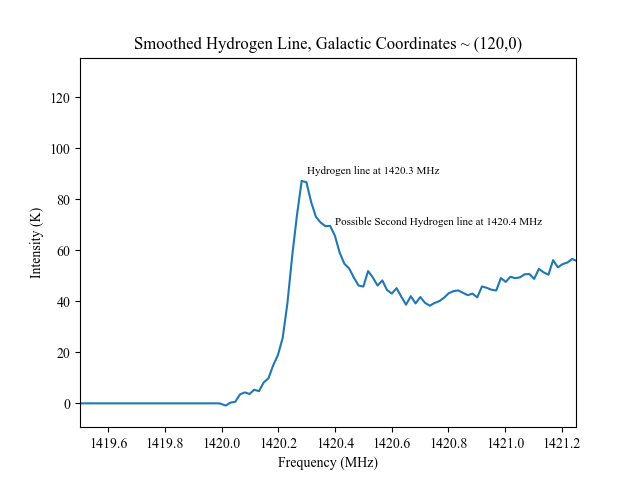

(1419.5, 1421.25)

In [66]:
sm_line = np.array(sm_on)/np.array(sm_off)

plt.plot(np.fft.fftshift(freqs_sm)*(-62.5/7)+1420,np.fft.fftshift(sm_line)*G-G)
plt.title('Smoothed Hydrogen Line, Galactic Coordinates ~ (120,0)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Intensity (K)')
plt.text(1420.3, 90, r'Hydrogen line at 1420.3 MHz', fontsize=8)
plt.text(1420.4, 70, r'Possible Second Hydrogen line at 1420.4 MHz', fontsize=8)
plt.ylim(480-G,625-G)
plt.xlim(1419.5, 1421.25)

In [17]:
y = np.array(sm_on)-np.array(sm_off)
z = s_on/s_off
matplotlib.rcParams['font.family'] = 'Times New Roman'
#plt.plot(np.arange(0,len(z)),z)
plt.title('s_line = s_on/s_off (lol)')

f = np.fft.fftshift(freqs)
plt.plot(f*-6.25+190+1230,z)
plt.savefig('calibrated spectrum ouchie')
plt.show()



In [26]:
vals_on

NameError: name 'vals_on' is not defined

In [120]:
vals_on

array([1599.])

In [13]:
2**15

32768

In [1]:
(2.27-2.261)/2.261

0.003980539584254709

In [61]:
v = (3*10**8)*(0.2)/1430.4

In [62]:
v

41946.30872483221